#Coral Area Measurements
##First Look
###Sergio Daniel Hernandez Charpak
###Jose Francisco Molano

<p>Notebook creado para el análisis de las imágenes de corales tomadas por Nancy Ruiz para el grupo BIOMMAR bajo la dirección de Susana Simancas en Uniandes en el marco del proyecto del curso Imágenes y Visión dictado por Marcela Hernández en el semestre 2016-10</p>

<p> Nuestra meta es usar esta librería http://scikit-image.org/docs/stable/api/api.html </p>

<p>Se pueden ver ejemplos en: http://scikit-image.org/docs/stable/auto_examples/index.html </p>

In [1]:
%pylab inline
import pylab
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
#from skimage.filters import threshold_otsu, threshold_adaptive
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage.measure import label
from skimage import measure
from skimage import morphology

In [3]:
inputfolder = '../../Fotos_prueba/'

This is a test on one of the images. We will make use of the glob library to analyze all the images

In [4]:
input_image = 'Coral6_S3.JPG'
output_name = './measurements_intermediate_steps_'+input_image.strip('.jpg')+'.dat'

In [5]:
fileout = open(output_name, 'w')

In [6]:
image = pylab.imread(inputfolder+input_image)

In [7]:
fileout.write("%s \n"%(inputfolder+input_image))

<p>The image is an RGB image. We will transform it on a first basis to simplify the process.</p>
<p> We follow the example: http://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_adapt_rgb.html#example-color-exposure-plot-adapt-rgb-py </p>

In [8]:
from skimage.color import rgb2gray
img = rgb2gray(image)

In [9]:
print (img.shape)

(480, 720)


Le cortamos los bordes a la imagen

In [10]:
n_x, n_y = img.shape

In [11]:
fileout.write("%d %d \n"%(n_x, n_y))

In [12]:
cut_prop = 0.04

In [13]:
fileout.write("%f \n"%(cut_prop))

In [14]:
n_colums_x = int(n_x*cut_prop)
n_colums_y = int(n_y*cut_prop)

In [15]:
print (n_colums_x,n_colums_y)
array_index_columns_x_0 = np.arange(n_colums_x)
array_index_columns_y_0 = np.arange(n_colums_y + 0.5*n_colums_y)

(19, 28)


In [16]:
array_index_columns_x_final = np.linspace(n_x-n_colums_x,n_x-1, n_colums_x)
array_index_columns_y_final = np.linspace(n_y-4.0*n_colums_y,n_y-1, 4.0*n_colums_y)

In [17]:
img_delete_x = np.delete(img,array_index_columns_x_final,0 )
img_delete_x = np.delete(img_delete_x,array_index_columns_x_0,0 )
img_delete_y = np.delete(img_delete_x,array_index_columns_y_final,1 )
img_delete_y = np.delete(img_delete_y,array_index_columns_y_0,1 )

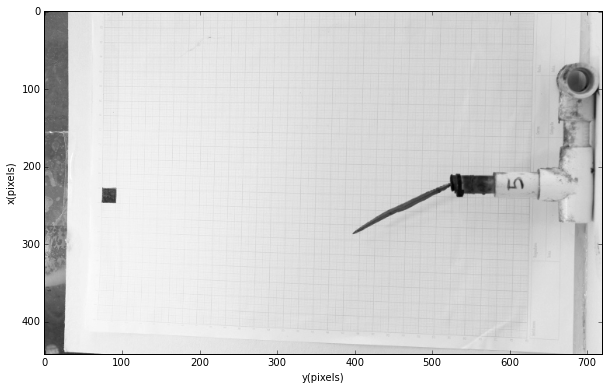

In [18]:
fig = plt.figure(figsize = (10,10))
plt.gray()
imshow(img_delete_x)
#plt.savefig("img_man_umbr_cut.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

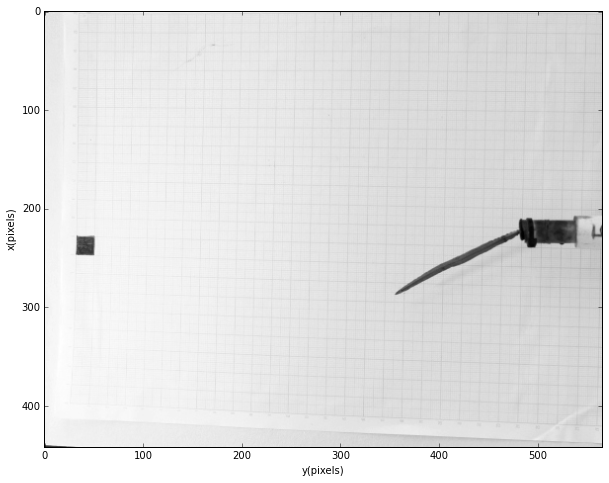

In [19]:
fig = plt.figure(figsize = (10,10))
plt.gray()
imshow(img_delete_y)
plt.savefig("img_man_umbr_cut.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [20]:
plt.close(fig)

In [21]:
img = img_delete_y

In [22]:
n_x_new, n_y_new = img.shape

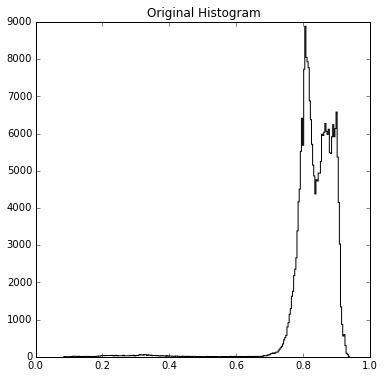

In [23]:
bins=256
fig = plt.figure(figsize = (6,6))
plt.title("Original Histogram")
plt.hist(img.ravel(), bins=bins, histtype='step', color='black')
plt.show()

In [24]:
def umbralizar_otsu(imagen):
    thresh = threshold_otsu(imagen)
    binary = imagen < thresh
    return binary, thresh

In [25]:
cut_y_img_umbr = 0.25 #Va a umbralizar el 0.25 de la imagen independientemente que el 0.75
n_y_cut = int(n_y_new*cut_y_img_umbr)

In [26]:
img_square = np.zeros((n_x_new, n_y_new))
img_coral = np.zeros((n_x_new, n_y_new))

In [27]:
for i in range (n_x_new):
    for j in range(n_y_new):
        if(j<n_y_cut):
            img_square[i,j] = img[i,j]
        else:
            img_coral[i,j] = img[i,j]

In [28]:
img_square_binary, thresh_square = umbralizar_otsu(img_square)
img_coral_binary, thresh_coral = umbralizar_otsu(img_coral)

In [29]:
img_thresholded = np.zeros((n_x_new, n_y_new))
for i in range (n_x_new):
    for j in range(n_y_new):
        if(j<n_y_cut):
            img_thresholded[i,j] = img_square_binary[i,j]
        else:
            img_thresholded[i,j] = img_coral_binary[i,j]

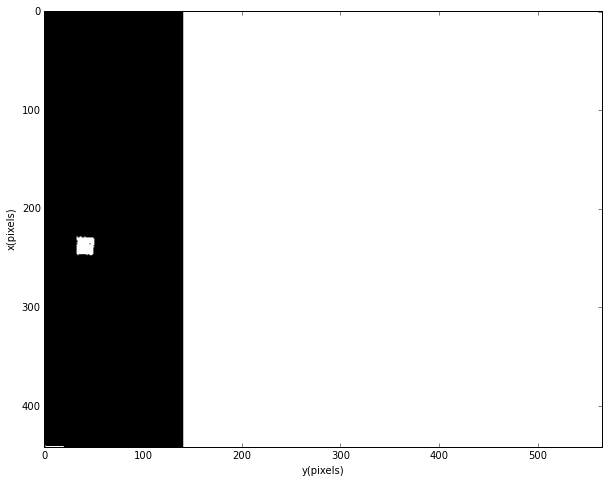

In [30]:
fig = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(img_square_binary)
#plt.savefig("img_man_umbr.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

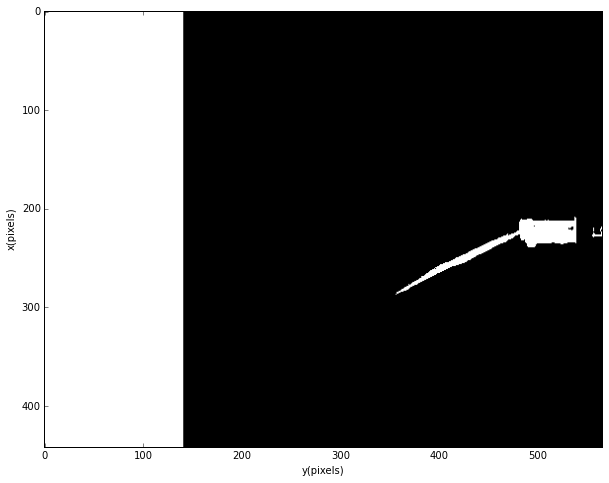

In [31]:
fig = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(img_coral_binary)
#plt.savefig("img_man_umbr.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [32]:
fileout.write("%f %f \n"%(thresh_square, thresh_coral))

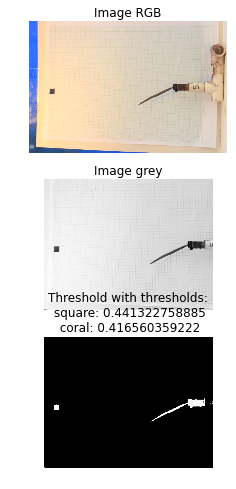

In [33]:
fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax0, ax1, ax2 = axes
plt.gray()

ax0.imshow(image)
ax0.set_title('Image RGB')

ax1.imshow(img)
ax1.set_title('Image grey')

ax2.imshow(img_thresholded)
ax2.set_title('Threshold with thresholds: \n square: '+ str(thresh_square) + '\n coral: '+ str(thresh_coral))

for ax in axes:
    ax.axis('off')
plt.savefig("imgs_first_look.png",format = 'png')
plt.show()

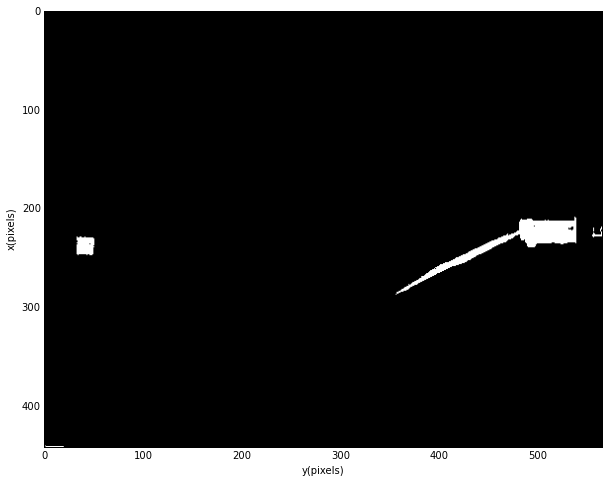

In [34]:
fig = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(img_thresholded)
plt.savefig("img_man_umbr.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [35]:
plt.close(fig)

In [36]:
img_thresholded_new = img_thresholded

In [37]:
n_x_new, n_y_new = img_thresholded_new.shape

In [38]:
fileout.write("%d %d \n"%(n_x_new, n_y_new))

##Square Area

Now we get the area of the square

In [39]:
threshold_up = int(n_y_new/4.0)

In [40]:
print (n_x_new, n_y_new, threshold_up)

(442, 566, 141)


In [41]:
fileout.write("%d \n"%(threshold_up))

In [42]:
img_thresholded_up = np.zeros((n_x_new,n_y_new))

In [43]:
for i in range (n_x_new):
    for j in range(threshold_up):
        img_thresholded_up[i,j] = img_thresholded_new[i,j]

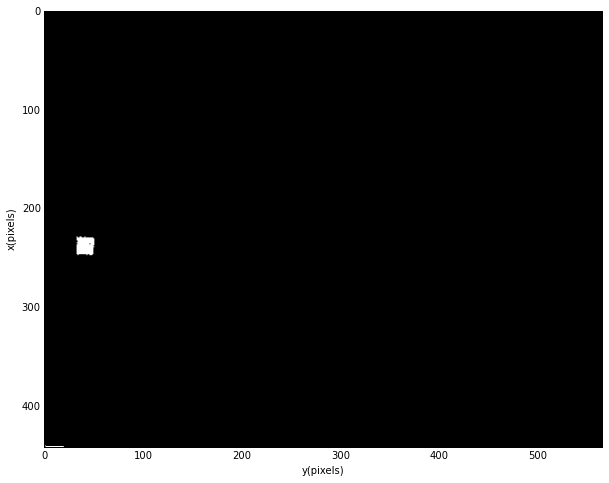

In [44]:
fig = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(img_thresholded_up)
plt.savefig("img_man_umbr_cut_up.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [45]:
etiquetas_square, num = label(img_thresholded_up, connectivity=2, return_num=True)

In [46]:
hist, bins_edges = np.histogram(etiquetas_square.ravel())

In [47]:
print np.sort(hist)[len(hist)-2]

302


In [48]:
etiquetas_square = morphology.remove_small_objects(etiquetas_square,np.sort(hist)[len(hist)-2] - 10)

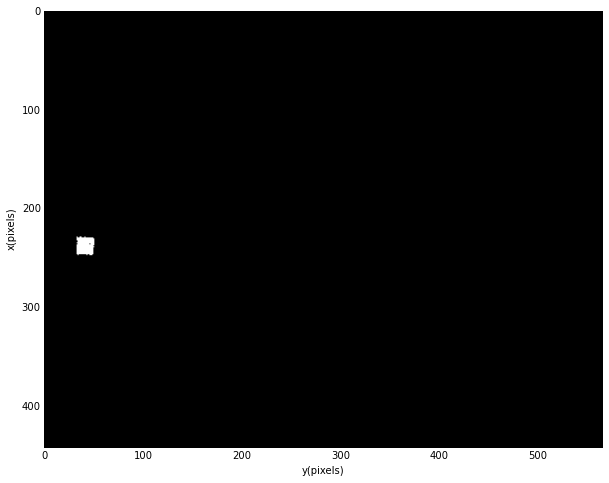

In [49]:
fig = plt.figure(figsize = (10,10))
plt.gray()
imshow(etiquetas_square)
#plt.savefig("img_man_umbr_cut_up.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [50]:
hist, bins_edges = np.histogram(etiquetas_square.ravel())

In [51]:
print (hist)

[249870      0      0      0      0      0      0      0      0    302]


In [52]:
area_square = np.sort(hist)[len(hist)-2]

In [53]:
fileout.write("%f \n"%(area_square))

In [54]:
etiquetas_square =(255/np.max(etiquetas_square))*etiquetas_square

In [55]:
image_scale = (255/np.max(img_thresholded_new))*img_thresholded_new

In [56]:
image_scale= image_scale - etiquetas_square

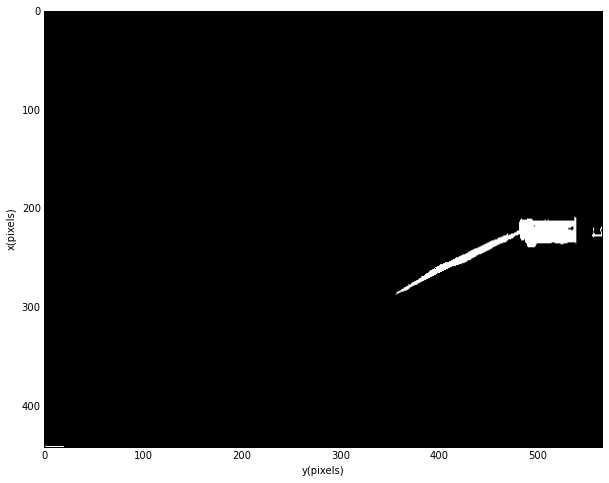

In [57]:
fig = plt.figure(figsize = (10,10))
plt.gray()
imshow(image_scale)
#plt.savefig("img_man_umbr_cut_up.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

## Coral Area

We extract the connected components to get the coral area

In [58]:
#blobs_labels = measure.label(img_thresholded_new, background=0)
etiquetas, num = label(image_scale, connectivity=2, return_num=True)

In [59]:
print (num)

4


In [60]:
etiquetas_scale = (255/np.max(etiquetas))*etiquetas

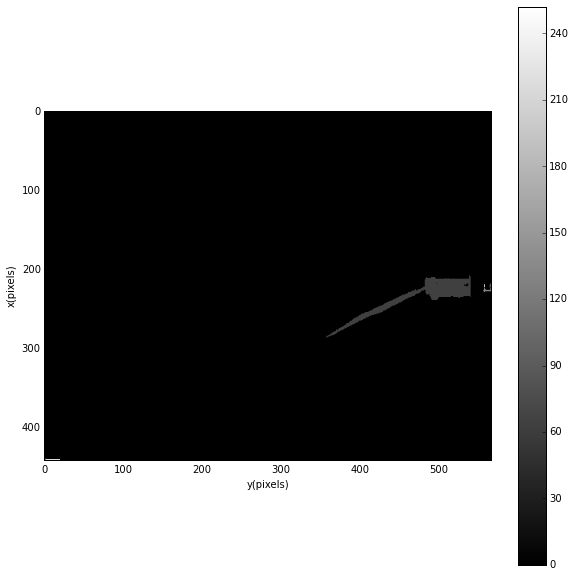

In [61]:
fig = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(etiquetas_scale)
#plt.savefig("img_man_label.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.colorbar()
plt.show()

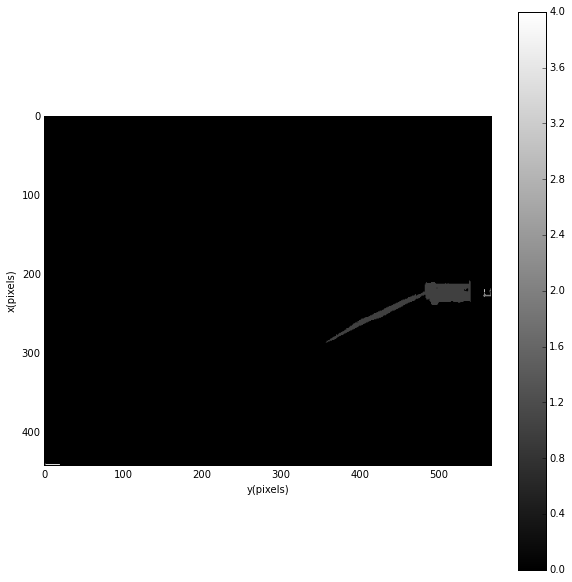

In [62]:
fig = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(etiquetas)
plt.savefig("img_man_label.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.colorbar()
plt.show()

Guardamos solo el objeto más grande luego del fondo

In [63]:
hist, bins = np.histogram(etiquetas.ravel())

In [64]:
x_hist = np.zeros(len(hist))
for i in range (len(x_hist)):
    x_hist[i] = (bins[i] + bins[i+1])/2.0

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


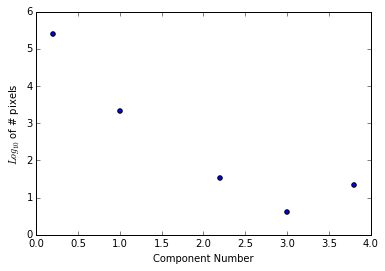

In [65]:
plt.scatter(x_hist,np.log10(hist))
plt.ylabel("$Log_{10}$ of # pixels")
plt.xlabel("Component Number")
#plt.xlim(1,len(hist))

In [66]:
hist_sorted = np.sort(hist)

In [67]:
print (hist_sorted)

[     0      0      0      0      0      4     22     33   2134 247979]


In [68]:
threshold_rm_objects = int (hist_sorted[len(hist_sorted)-2] - hist_sorted[len(hist_sorted)-2]/5.0)

In [69]:
print (threshold_rm_objects)

1707


In [70]:
fileout.write("%f \n"%(threshold_rm_objects))

In [71]:
c = morphology.remove_small_objects(etiquetas,threshold_rm_objects)

(array([ 248038.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,    2134.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

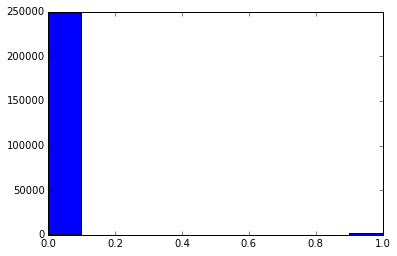

In [72]:
plt.hist(c.ravel())

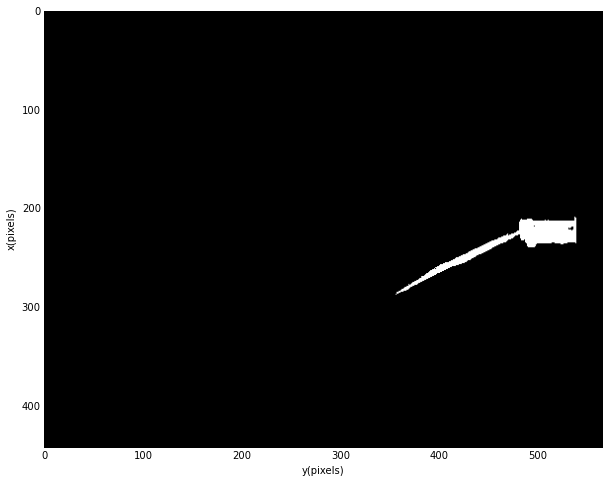

In [73]:
fig = plt.figure(figsize = (10,10))
#plt.gray()
plt.imshow(c)
plt.savefig("img_coral_holes_cut.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [74]:
n_dilation_erosion = 6

In [75]:
fileout.write("%d \n"%(n_dilation_erosion))

In [76]:
d = c
for i in range (n_dilation_erosion):
       d = morphology.dilation(d)

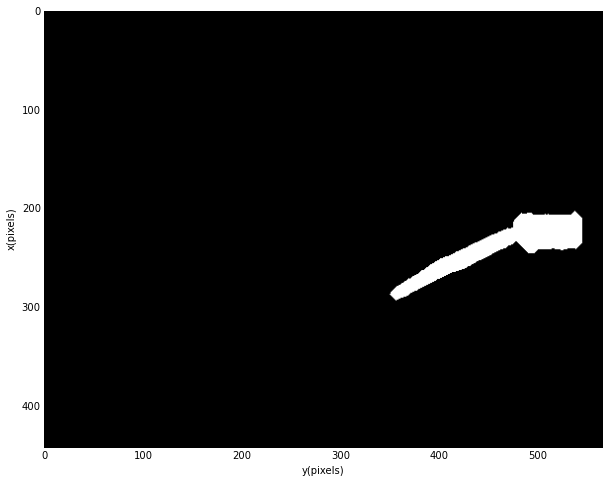

In [77]:
fig = plt.figure(figsize = (10,10))
#plt.gray()
plt.imshow(d)
#plt.savefig("img_man_umbr_cut.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [78]:
for i in range (n_dilation_erosion):
       d = morphology.erosion(d)

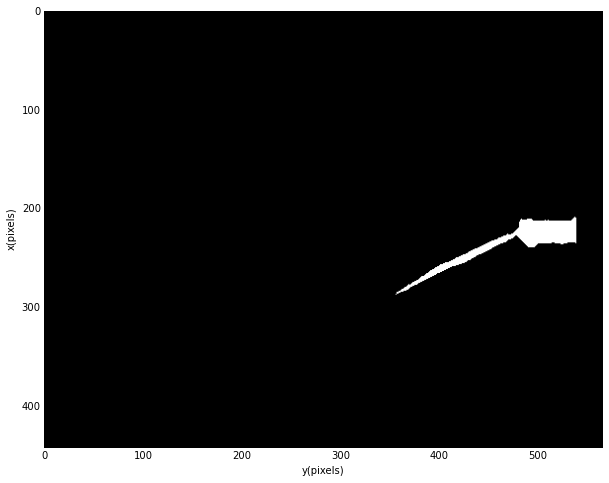

In [79]:
fig = plt.figure(figsize = (10,10))
#plt.gray()
plt.imshow(d)
#plt.savefig("img_man_umbr_cut.png",format = 'png')
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [80]:
hist, bins = np.histogram(d.ravel())

In [81]:
print (np.sort(hist))

[     0      0      0      0      0      0      0      0   2190 247982]


In [82]:
threshold_rm_objects =  (np.sort(hist)[len(hist)-2]) - int((np.sort(hist)[len(hist)-2])/50.0)

In [83]:
print (threshold_rm_objects)

2147


In [84]:
d = morphology.remove_small_objects(d,threshold_rm_objects)

/usr/local/lib/python2.7/dist-packages/skimage/morphology/misc.py:122: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


In [85]:
etiquetas_coral, num = label(d, connectivity=2, return_num=True)

In [86]:
print (num)
print (etiquetas_coral.shape)

1
(442, 566)


In [87]:
hist, bins = np.histogram(etiquetas_coral.ravel())

In [88]:
print (hist)

[247982      0      0      0      0      0      0      0      0   2190]


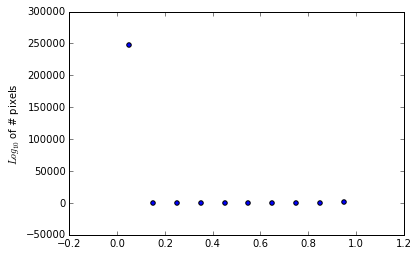

In [89]:
x_hist = np.zeros(len(hist))
for i in range (len(x_hist)):
    x_hist[i] = (bins[i] + bins[i+1])/2.0
plt.scatter(x_hist,hist)
plt.ylabel("$Log_{10}$ of # pixels")

In [90]:
area_coral_pixels = np.sort(hist)[len(hist)-2]

In [91]:
fileout.write("%f \n"%(area_coral_pixels))

In [92]:
area_coral_cm_2 = area_coral_pixels/area_square

In [93]:
fileout.write("%f \n"%(area_coral_cm_2))

In [94]:
fileout.close()

In [95]:
output_name = './area_coral_cm2_'+input_image.strip('.jpg')+'.dat'
fileout = open(output_name, 'w')
fileout.write("%f \n"%(area_coral_cm_2))
fileout.close()

In [96]:
etiquetas_coral = (255/np.max(etiquetas_coral))*etiquetas_coral

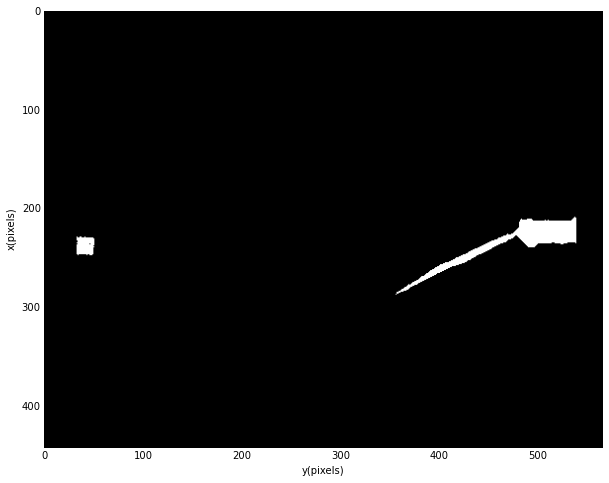

In [97]:
final_image = etiquetas_square + etiquetas_coral
fig = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(final_image)
plt.savefig("final_image_"+input_image.strip('.JPG')+".png")
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [98]:
plt.close(fig)

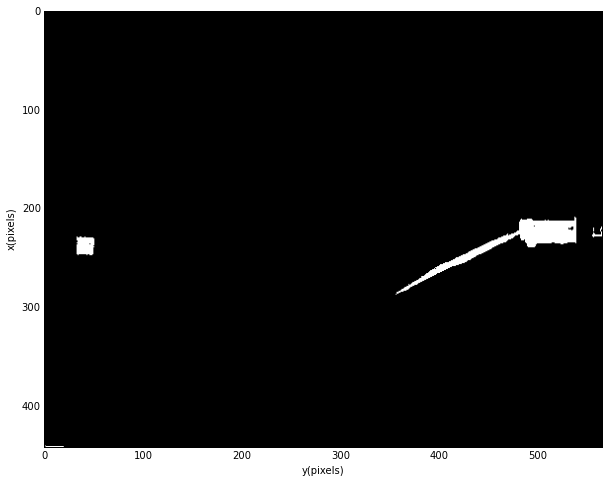

In [99]:
fig = plt.figure(figsize = (10,10))
plt.gray()
plt.imshow(img_thresholded)
plt.xlabel("y(pixels)")
plt.ylabel("x(pixels)")
plt.show()

In [100]:
plt.close(fig)